In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\balam\Guvi\Miniproject\food_listings_data.csv')
data.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


In [2]:
data.tail()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
995,996,Fish,15,3/30/2025,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,3/18/2025,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,3/22/2025,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,3/30/2025,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch
999,1000,Salad,18,3/19/2025,155,Supermarket,Charlesview,Non-Vegetarian,Dinner


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Food_ID        1000 non-null   int64 
 1   Food_Name      1000 non-null   object
 2   Quantity       1000 non-null   int64 
 3   Expiry_Date    1000 non-null   object
 4   Provider_ID    1000 non-null   int64 
 5   Provider_Type  1000 non-null   object
 6   Location       1000 non-null   object
 7   Food_Type      1000 non-null   object
 8   Meal_Type      1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [4]:
data.nunique()

Food_ID          1000
Food_Name          10
Quantity           50
Expiry_Date        15
Provider_ID       637
Provider_Type       4
Location          624
Food_Type           3
Meal_Type           4
dtype: int64

In [5]:
data.isnull().sum()

Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64

In [6]:
(data.isnull().sum()/(len(data)))*100

Food_ID          0.0
Food_Name        0.0
Quantity         0.0
Expiry_Date      0.0
Provider_ID      0.0
Provider_Type    0.0
Location         0.0
Food_Type        0.0
Meal_Type        0.0
dtype: float64

In [7]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Food_Name', 'Expiry_Date', 'Provider_Type', 'Location', 'Food_Type',
       'Meal_Type'],
      dtype='object')
Numerical Variables:
['Food_ID', 'Quantity', 'Provider_ID']


In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Food_ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Food_Name,1000,10,Rice,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,25.794,14.609894,1.0,13.0,26.0,39.0,50.0
Expiry_Date,1000,15,3/24/2025,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provider_ID,1000.0,NaN,NaN,NaN,497.497,291.681,1.0,241.0,498.5,752.0,1000.0
Provider_Type,1000,4,Supermarket,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,1000,624,New Carol,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food_Type,1000,3,Vegetarian,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meal_Type,1000,4,Breakfast,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Food_ID
Skew : 0.0


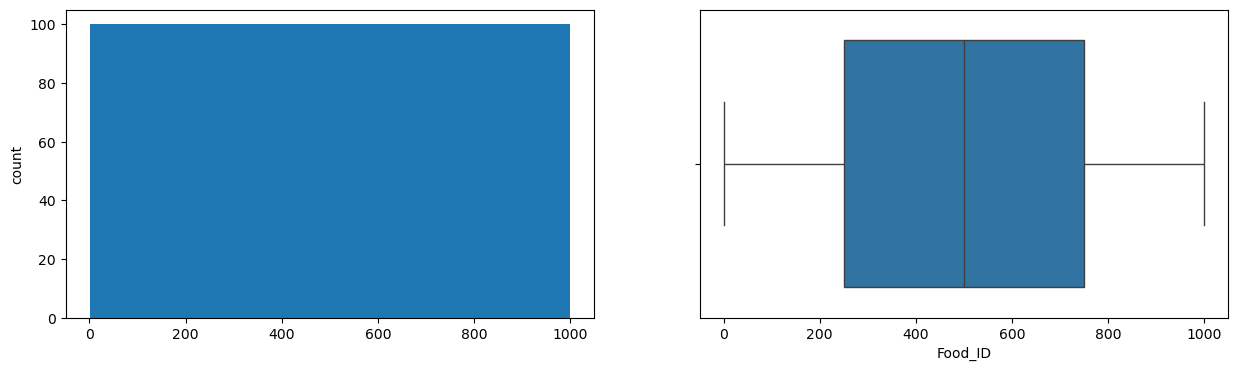

Quantity
Skew : -0.02


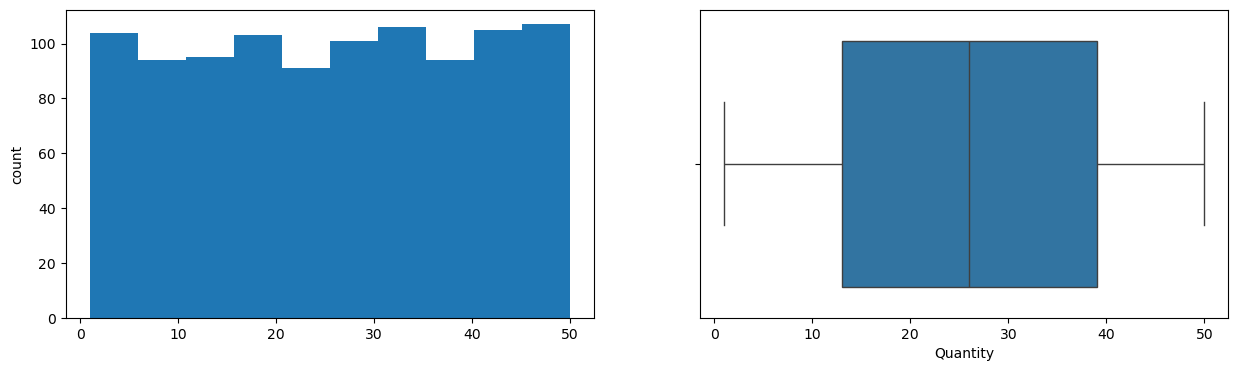

Provider_ID
Skew : 0.02


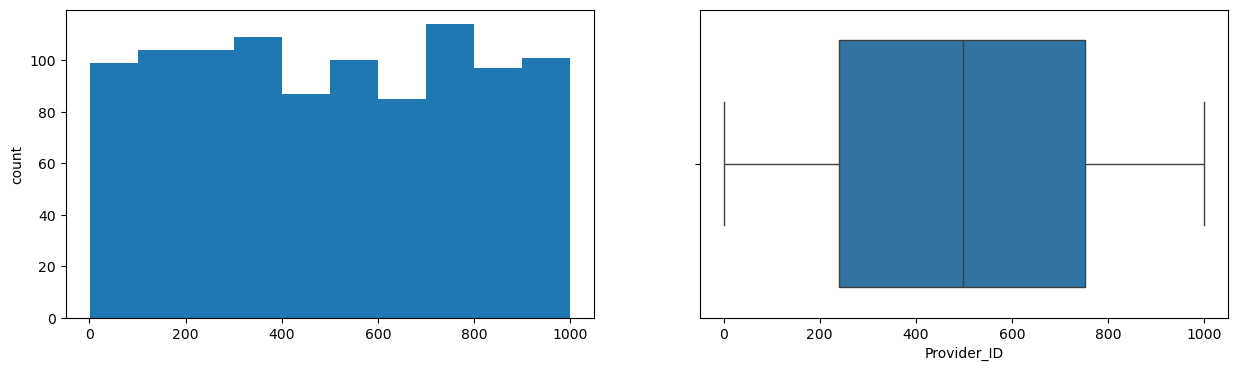

In [9]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

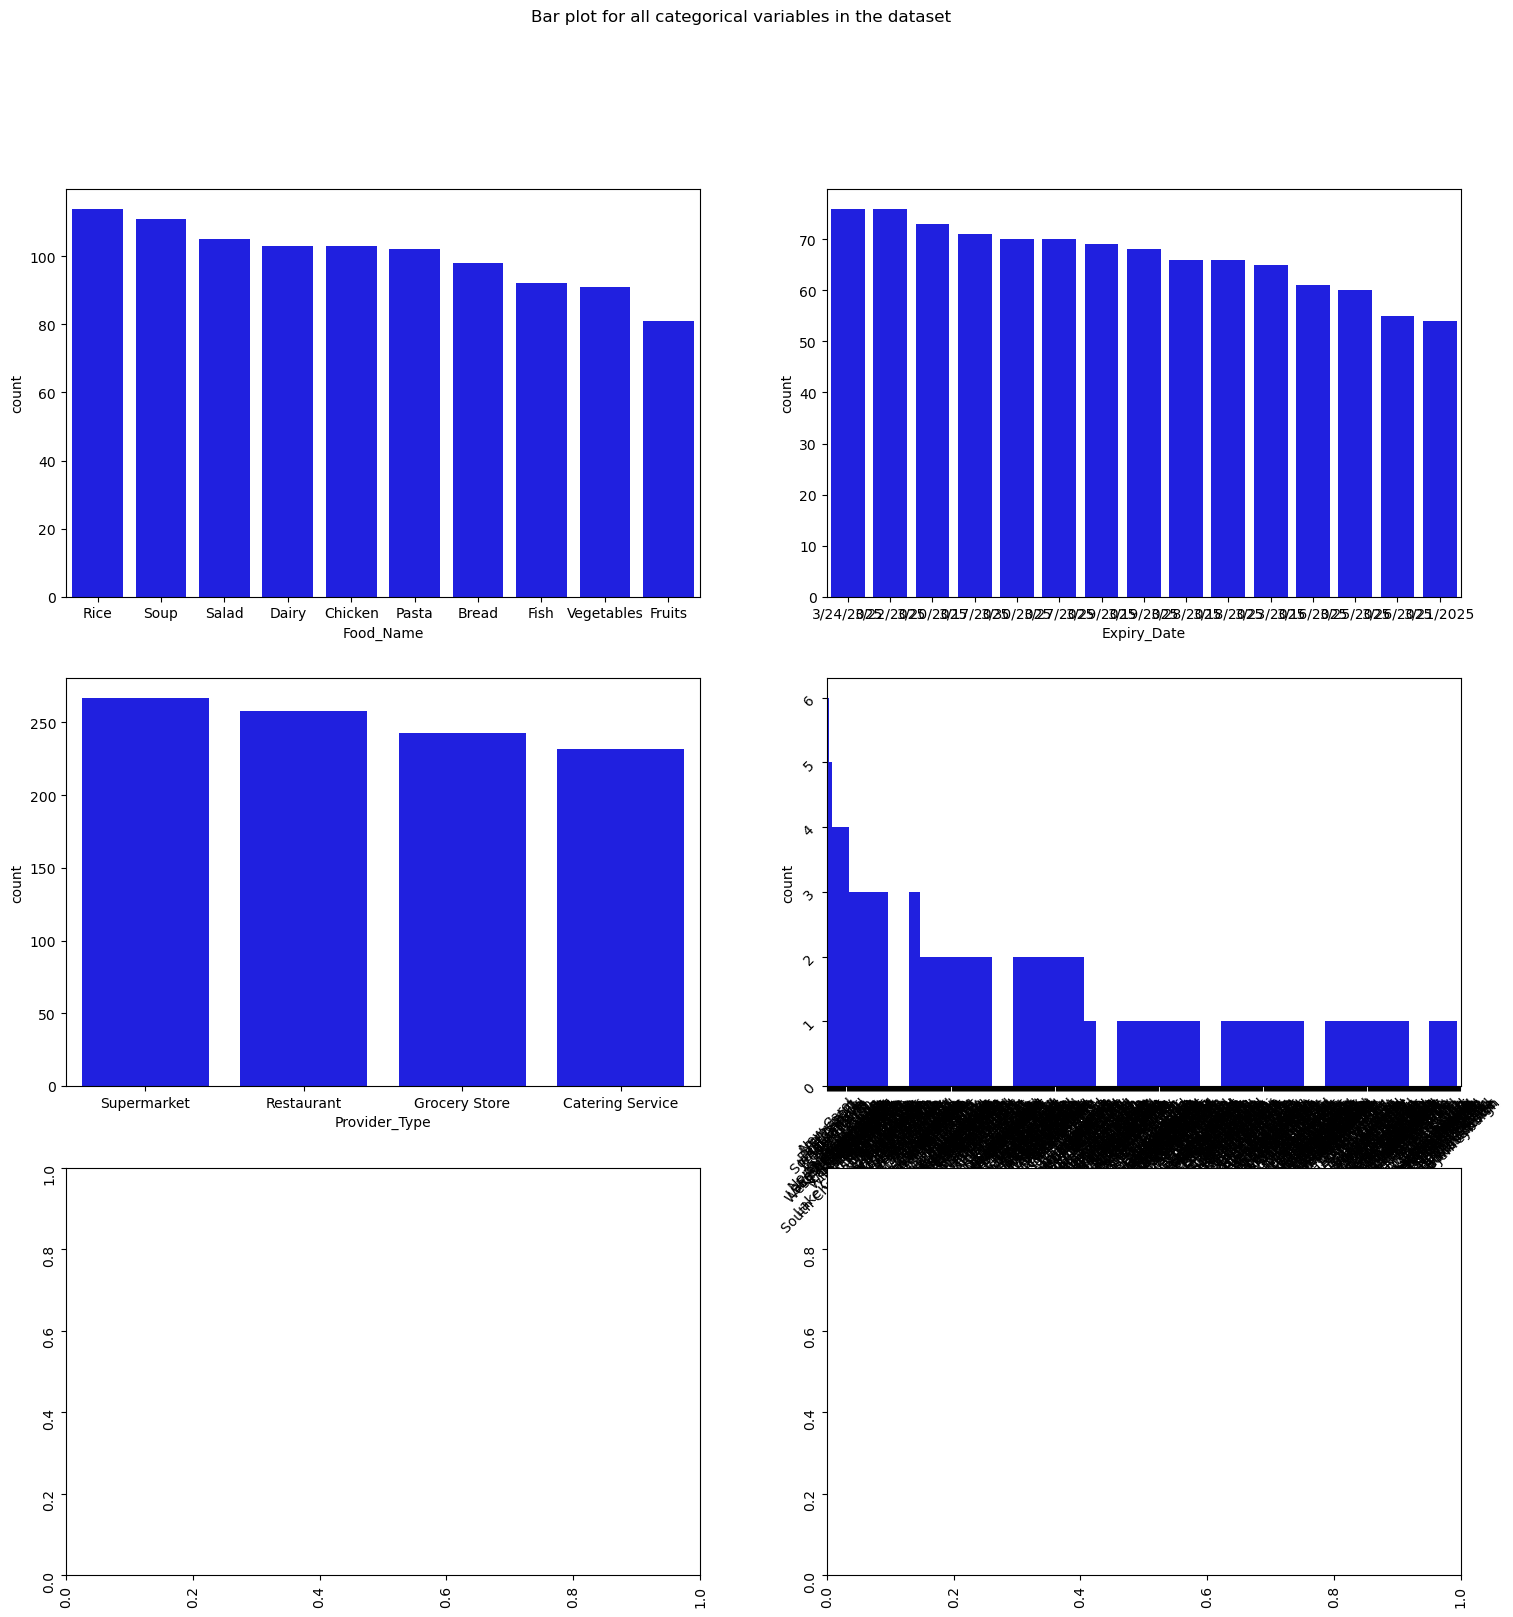

In [12]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))

fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Food_Name', data = data, color = 'blue', 
              order = data['Food_Name'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Expiry_Date', data = data, color = 'blue', 
              order = data['Expiry_Date'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Provider_Type', data = data, color = 'blue', 
              order = data['Provider_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Food_Type', data = data, color = 'blue', 
              order = data['Meal_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Food_Type', data = data, color = 'blue', 
              order = data['Meal_Type'].value_counts().index);


axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [16]:
data['Expiry_Date']

0      3/17/2025
1      3/24/2025
2      3/28/2025
3      3/16/2025
4      3/19/2025
         ...    
995    3/30/2025
996    3/18/2025
997    3/22/2025
998    3/30/2025
999    3/19/2025
Name: Expiry_Date, Length: 1000, dtype: object